In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('/content/HepatitisCdata.csv')

In [4]:
df.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [5]:
df.tail(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
605,606,3=Cirrhosis,42,f,33.0,79.0,3.7,55.7,200.0,1.72,5.16,89.1,146.3,69.9
606,607,3=Cirrhosis,49,f,33.0,190.7,1.2,36.3,7.0,6.92,3.82,485.9,112.0,58.5
607,608,3=Cirrhosis,52,f,39.0,37.0,1.3,30.4,21.0,6.33,3.78,158.2,142.5,82.7
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [6]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [8]:
df.isnull().sum()/len(df)*100

Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
ALB           0.162602
ALP           2.926829
ALT           0.162602
AST           0.000000
BIL           0.000000
CHE           0.000000
CHOL          1.626016
CREA          0.000000
GGT           0.000000
PROT          0.162602
dtype: float64

In [9]:
df.fillna(df.median(),inplace= True)

In [10]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [11]:
df = df.drop('Unnamed: 0', axis = 1)

In [12]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [13]:
#Dealing with Numeric Values
df['Category'] = df['Category'].map({'0=Blood Donor':0, '0s=Suspect Blood Donor':0, '1=Hepatisis':1,'2=Fibrosis':1,
                                     '3=Cirrhosis':1,'3=Cirrhosis':1})
df['Sex'] = df['Sex'].map({'f':1,'m':0})

In [14]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0.0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0.0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0.0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0.0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [15]:
df.dtypes

Category    float64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

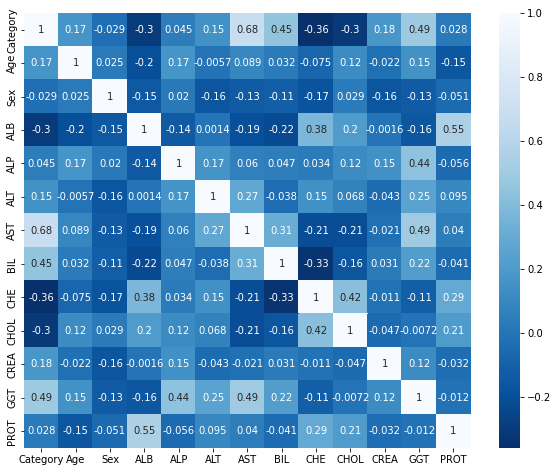

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap ="Blues_r")

In [17]:
print('Suspected Patients:', df.Category.value_counts()[0])
print('Healthy Patients:',df.Category.value_counts()[1])

Suspected Patients: 533
Healthy Patients: 51


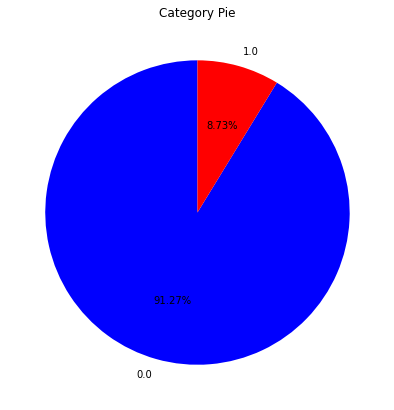

In [18]:
labels = df['Category'].value_counts(sort = True).index
sizes = df['Category'].value_counts(sort = True)
colors = ["Blue","Red"]
plt.figure(figsize = (7,7))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%',startangle=90)
plt.title('Category Pie')
plt.show()

In [19]:
print('Suspected Female Patients:',df.Sex.value_counts()[1])
print('Suspected Male Patients:',df.Sex.value_counts()[0])

Suspected Female Patients: 238
Suspected Male Patients: 377


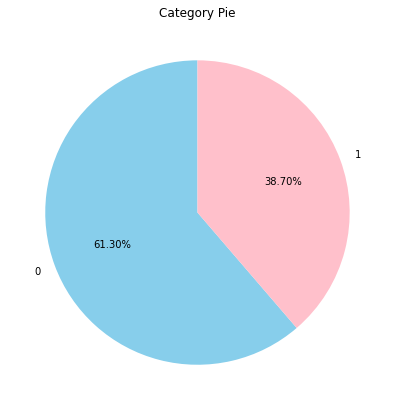

In [20]:
labels = df['Sex'].value_counts(sort = True).index
sizes = df['Sex'].value_counts(sort = True)
colors = ["skyblue","pink"]
plt.figure(figsize = (7,7))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%',startangle=90)
plt.title('Category Pie')
plt.show()

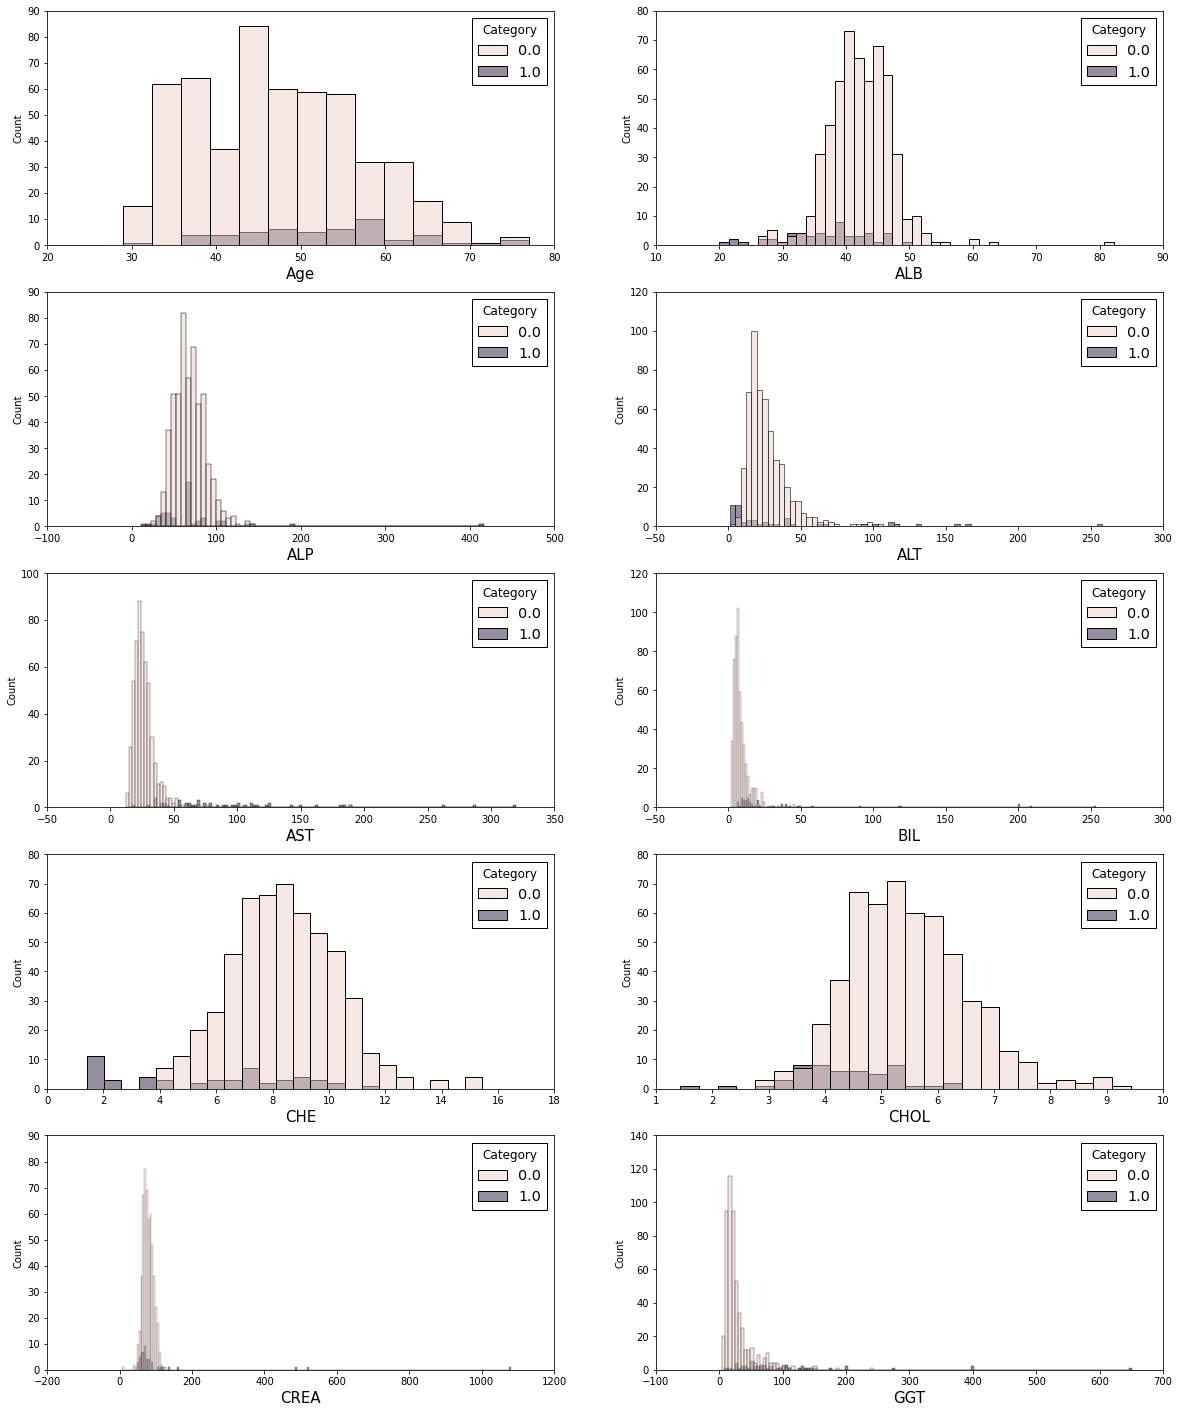

In [21]:
fig, ax =plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)
sns.histplot(x = df["ALB"], hue = df["Category"], ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)
sns.histplot(x = df["ALP"], hue = df["Category"],  ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)
sns.histplot(x = df["ALT"], hue = df["Category"],  ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)
sns.histplot(x = df["AST"], hue = df["Category"],  ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)
sns.histplot(x = df["BIL"], hue = df["Category"],  ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)
sns.histplot(x = df["CHE"], hue = df["Category"],  ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)
sns.histplot(x = df["CHOL"], hue = df["Category"], ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);
sns.histplot(x = df["CREA"], hue = df["Category"], ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)
sns.histplot(x = df["GGT"], hue = df["Category"],  ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

ML MODELS

In [92]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [103]:
X = df.drop(["Category"],axis=1)
Y = df['Category']

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state=42)

In [105]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LOGISTIC REGRESSION

In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
LrScore = lr.score(X_test, Y_test)
print("Accuracy Score on Logistic Regression Model:", LrScore )

Accuracy Score on Logistic Regression Model: 0.9105691056910569


Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

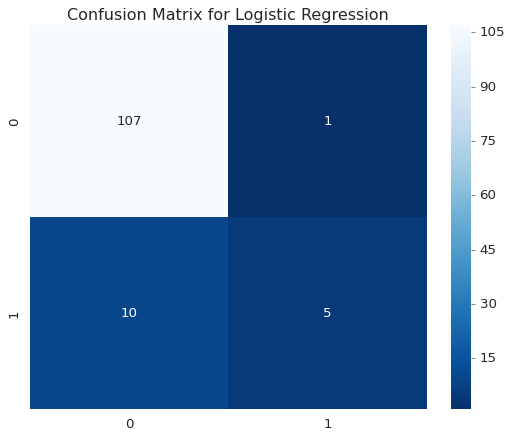

In [129]:
from sklearn.metrics import confusion_matrix
lrPred = lr.predict(X_test)
lr_cf = confusion_matrix(Y_test, lrPred)
sns.heatmap(cf_matrix, annot= True, fmt="d", cmap='Blues_r')
plt.title('Confusion Matrix for Logistic Regression')

In [122]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(Y_test, lrPred))


              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       108
         1.0       0.83      0.33      0.48        15

    accuracy                           0.91       123
   macro avg       0.87      0.66      0.71       123
weighted avg       0.90      0.91      0.89       123



Random Forest Classifier

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfScore = rfc.score(X_test, Y_test)
print("Accuracy Score on Random Forest Classifier:", rfScore)

Accuracy Score on Random Forest Classifier: 0.9349593495934959


Confusion Matrix for Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matric for Random Forest Classifier')

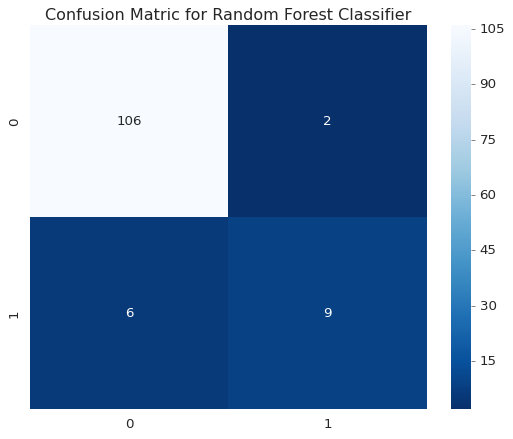

In [128]:
rfcPred = rfc.predict(X_test)
rfc_cf = confusion_matrix(Y_test, rfcPred)
sns.heatmap(rfc_cf, annot = True, fmt="d", cmap='Blues_r')
plt.title("Confusion Matric for Random Forest Classifier")

In [130]:
print(metrics.classification_report(Y_test, rfcPred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       108
         1.0       0.82      0.60      0.69        15

    accuracy                           0.93       123
   macro avg       0.88      0.79      0.83       123
weighted avg       0.93      0.93      0.93       123



K NEIGHBORS CLASSIFIER

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knnScore = knn.score(X_test, Y_test)
print("Accuracy Score on K Neighbors Classifier:", knnScore)

Accuracy Score on K Neighbors Classifier: 0.9024390243902439


Confusion Matrix for K Neighbors Classifier

Text(0.5, 1.0, 'Confusion Matrix for K Neighbors Classifier')

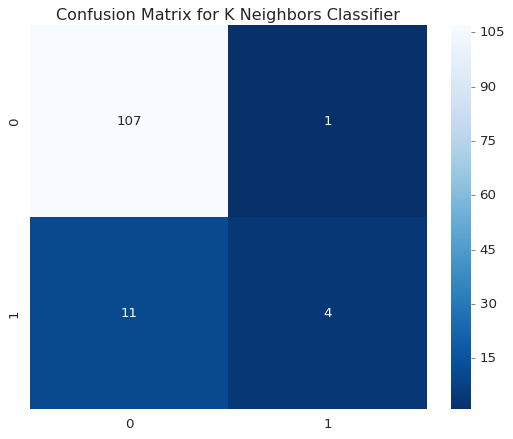

In [133]:
knnPred = knn.predict(X_test)
knn_cf = confusion_matrix(Y_test, knnPred)
sns.heatmap(knn_cf, annot=True,fmt="d", cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier")

In [134]:
print(metrics.classification_report(Y_test, knnPred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       108
         1.0       0.80      0.27      0.40        15

    accuracy                           0.90       123
   macro avg       0.85      0.63      0.67       123
weighted avg       0.89      0.90      0.88       123



Decision Tree Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtcScore = dtc.score(X_test, Y_test)
print("Accuracy Score on Decision Tree Classifier:",dtcScore)

Accuracy Score on Decision Tree Classifier: 0.8780487804878049


Confusion Matrix for Decision Tree Classifier

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

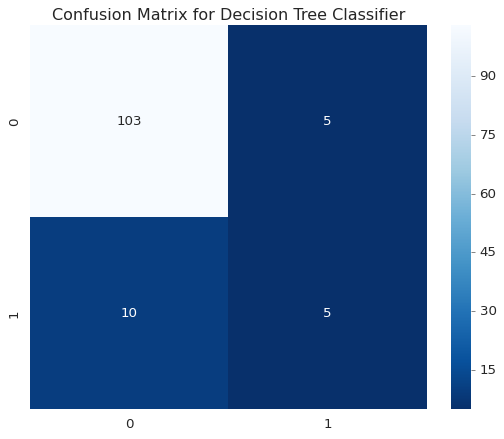

In [136]:
dtcPred = dtc.predict(X_test)
dtc_cf = confusion_matrix(Y_test, dtcPred)
sns.heatmap(dtc_cf, annot=True, fmt="d", cmap="Blues_r")
plt.title("Confusion Matrix for Decision Tree Classifier")

In [138]:
print(metrics.classification_report(Y_test, dtcPred))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       108
         1.0       0.50      0.33      0.40        15

    accuracy                           0.88       123
   macro avg       0.71      0.64      0.67       123
weighted avg       0.86      0.88      0.87       123



Gradient Boosting Classifier

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
gbcScore = gbc.score(X_test,Y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",gbcScore)

Accuracy obtained by Gradient Boosting Classifier model: 0.926829268292683


Confusion Matrix for Gradient Boosting Classifier

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

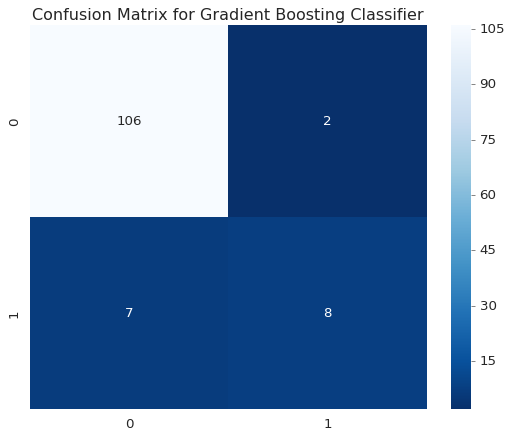

In [150]:
gbcPred = gbc.predict(X_test)
gbc_cf = confusion_matrix(Y_test, gbcPred)
sns.heatmap(gbc_cf, annot=True,fmt="d",cmap='Blues_r')
plt.title("Confusion Matrix for Gradient Boosting Classifier")

In [151]:
print(metrics.classification_report(Y_test, gbcPred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       108
         1.0       0.80      0.53      0.64        15

    accuracy                           0.93       123
   macro avg       0.87      0.76      0.80       123
weighted avg       0.92      0.93      0.92       123



Text(0.5, 1.0, 'Model Comparison')

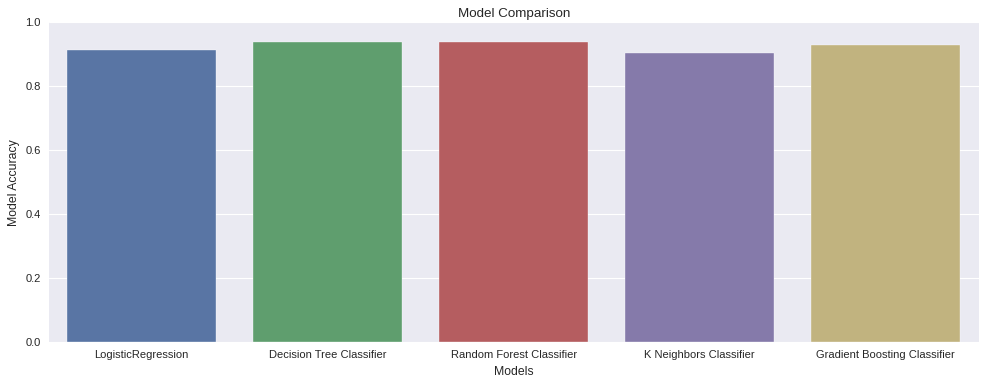

In [154]:
plt.style.use("seaborn")
x= ["LogisticRegression","Decision Tree Classifier","Random Forest Classifier","K Neighbors Classifier","Gradient Boosting Classifier"]
y= [LrScore, rfScore, rfScore, knnScore, gbcScore]
plt.subplots(figsize=(15,5))
sns.barplot(x=x, y=y)
plt.ylabel("Model Accuracy")
plt.xlabel("Models")
plt.title("Model Comparison")

In [169]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 4, 6],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rfc = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid, 
                           cv = 10, n_jobs = -1)

In [170]:
grid_search_rfc.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [171]:
grid_search_rfc.best_params_

{'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [172]:
grid_search_rfc.best_score_

0.9715918367346938

In [173]:
grid_search_rfc_predict = grid_search_rfc.predict(X_test)

In [174]:
print(classification_report(Y_test, grid_search_rfc_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       108
         1.0       0.90      0.60      0.72        15

    accuracy                           0.94       123
   macro avg       0.92      0.80      0.84       123
weighted avg       0.94      0.94      0.94       123

